# Linear Regression using Tensorfow data flow graph


NOTE: this has nothing to do with neural networks.

This notebook teaches an usage of tensorflow's dataflow graph + gradient descent optimizer for linear regression


### Dataset and the Task  overview:
Courtesy : Airial Intelligence.   

The datset used is from this datascience challenge: https://github.com/aerialintel/data-science-challenge

The task here is to predict the yield of wheat. 


In [110]:
%%bash
# Download the dataset
[ ! -d dataset ] && mkdir dataset
[ ! -f dataset/wheat-2013-supervised.csv ] && wget https://aerialintel.blob.core.windows.net/recruiting/datasets/wheat-2013-supervised.csv -O dataset/wheat-2013-supervised.csv  
# [ ! -f dataset/wheat-2014-supervised.csv ] && wget https://aerialintel.blob.core.windows.net/recruiting/datasets/wheat-2014-supervised.csv -O dataset/wheat-2014-supervised.csv

In [80]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import sys
import os
import time
current_milli_time = lambda: int(round(time.time() * 1000))


In [107]:
path = "dataset/wheat-2013-supervised.csv"
df=pd.read_csv(path, sep=',')
df=df[:10000]     # for a smaller dataset for quick experimentation
display(df[0:5])

train_X = df.iloc[:, range(5,15)] # basic features
train_Y = df.iloc[:, [25]]        # Labels


,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.811686,-118.695237,11/30/2013 0:00,35.70,20.85,0.00,29.53,0.91,...,0,1027.13,35.70,27.48,2.46,214,1.18,134.110657,0,35.7
1,Adams,Washington,46.929839,-118.352109,11/30/2013 0:00,35.10,26.92,0.00,29.77,0.93,...,0,1026.87,35.10,26.92,2.83,166,1.01,131.506592,0,35.7
2,Adams,Washington,47.006888,-118.510160,11/30/2013 0:00,33.38,26.95,0.00,29.36,0.94,...,0,1026.88,33.38,26.95,2.95,158,1.03,131.472946,0,35.7
3,Adams,Washington,47.162342,-118.699677,11/30/2013 0:00,28.05,25.93,0.91,29.47,0.94,...,0,1026.37,33.19,27.17,2.89,153,1.84,131.288300,0,35.7
4,Adams,Washington,47.157512,-118.434056,11/30/2013 0:00,28.83,25.98,0.91,29.86,0.94,...,0,1026.19,33.85,27.07,2.97,156,1.85,131.288300,0,35.7


In [108]:
#train_X[0:3]
#Y[0:3]

train_X = train_X.as_matrix()
train_Y = train_Y.as_matrix()

In [111]:
train_X.shape, train_Y.shape


((10000, 10), (10000, 1))

Epoch = 3  Training cost= 3290.35  W= [ 0.50202197 -0.71432447  0.45135888  1.53339005  2.16887093  0.00756516
  0.03683155  0.79745901  1.21918154  0.65199518]  b= [ 3.54992509]
Epoch = 7  Training cost= 3545.78  W= [ 0.53028524 -0.51294017  0.76944953  1.33049798  3.98809338  0.01321977
  0.06082681  1.38437867  1.77836943  1.2440021 ]  b= [ 6.54370832]
Epoch = 11  Training cost= 3561.35  W= [ 0.52964783 -0.38242337  1.03272319  1.13514972  5.6051116   0.01823431
  0.08018073  1.89801979  2.02878428  1.84203005]  b= [ 9.16207218]
Epoch = 15  Training cost= 3325.56  W= [ 0.46652761 -0.31932497  1.20993543  1.00125337  7.01392603  0.02279235
  0.09651474  2.34582019  2.18599558  2.38200974]  b= [ 11.39697552]
Epoch = 19  Training cost= 3127.38  W= [ 0.41846704 -0.23212326  1.25548387  0.84717125  8.23327065  0.027003
  0.1113037   2.74090934  2.27914762  2.89597249]  b= [ 13.28974056]
Epoch = 23  Training cost= 3477.34  W= [ 0.45878983 -0.12122732  1.20230746  0.77553397  9.3246994   0

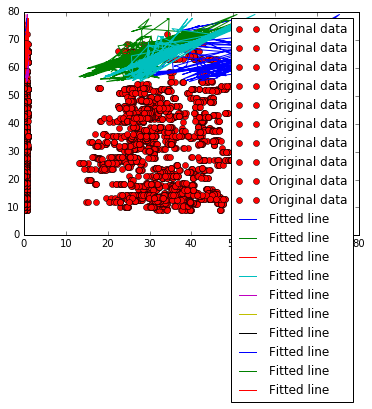

In [109]:
n_recs, n_attrs = train_X.shape

## Tensorflow for linear regression
X = tf.placeholder("float", [None, n_attrs])
Y = tf.placeholder("float", [None, 1])

W = tf.Variable(tf.zeros([n_attrs, 1]))
b = tf.Variable(tf.zeros([1]))

Y_ = tf.matmul(X, W) + b

learning_rate = 0.001

# Root Mean squared error
cost = tf.sqrt(tf.reduce_sum(tf.pow(Y_ - Y, 2)))

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

num_epochs = 10

progress_delay = 10 * 1000 
last_time = current_milli_time()

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for e in range(num_epochs):
        for x, y in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: np.array([x]), Y: np.array([y])})
        if (current_milli_time() - last_time > progress_delay):
            last_time = current_milli_time()
            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print "Epoch =", e," Training cost=", training_cost, " W=", sess.run(W).flatten(), " b=", sess.run(b)

    print ("Optimization finished.")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, " W=", sess.run(W).flatten(), " b=", sess.run(b)
    
    # predictions
    preds = sess.run(Y_, feed_dict={X: train_X, Y: train_Y})
    
    # Graphic display
    plt.plot(train_X[0:1000], train_Y[0:1000], 'ro', label='Original data')
    plt.plot(train_X[0:1000], preds[0:1000], label='Fitted line')
    plt.legend()
    plt.show()

(1, 3)